# **Malware Detection**

## Dataset: Benign & malicious PE Files for malware detection
##### * Context
This dataset is a result of a my research about Machine Learning & Malware Detection.

It was built using a Python Library and contains benign and malicious data from PE Files.

##### * Inspiration
Machine Learning Antimalware

In [1]:
import numpy as np
import pandas as pd
import os

**Creating a DataFrame**

In [3]:
df_train = pd.read_csv("./dataset_malwares.csv")

In [4]:
df_train.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [5]:
df_train.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [7]:
df_train.Malware

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

**Malware is our target, 0 = Benign, 1 = Malware**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
print("Columns having only 1 unique Value")
for col in df_train:
    if len(df_train[col].unique())==1:
        print(col)

Columns having only 1 unique Value
e_magic
SectionMaxEntropy
SectionMaxRawsize
SectionMaxVirtualsize
SectionMinPhysical
SectionMinVirtual
SectionMinPointerData
SectionMainChar


In [23]:
X=df_train.drop(['Name','Malware','e_magic',
'SectionMaxEntropy',
'SectionMaxRawsize',
'SectionMaxVirtualsize',
'SectionMinPhysical',
'SectionMinVirtual',
'SectionMinPointerData',
'SectionMainChar'],axis=1)

In [25]:
df_test=pd.read_csv("./dataset_test.csv")
X_t=df_test.drop(['Name','e_magic',
'SectionMaxEntropy',
'SectionMaxRawsize',
'SectionMaxVirtualsize',
'SectionMinPhysical',
'SectionMinVirtual',
'SectionMinPointerData',
'SectionMainChar'],axis=1)

In [26]:
y=df_train['Malware']

In [28]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Train Valid Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# **KNN Classifier**

In [31]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [32]:
y_pred=neigh.predict(X_valid)

In [37]:
def c_r(y_valid,y_pred):
    ax=sns.heatmap(confusion_matrix(y_pred, y_valid), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    print(classification_report(y_valid, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.94      0.99      0.96      1004
     Malware       0.99      0.98      0.99      2919

    accuracy                           0.98      3923
   macro avg       0.97      0.98      0.97      3923
weighted avg       0.98      0.98      0.98      3923



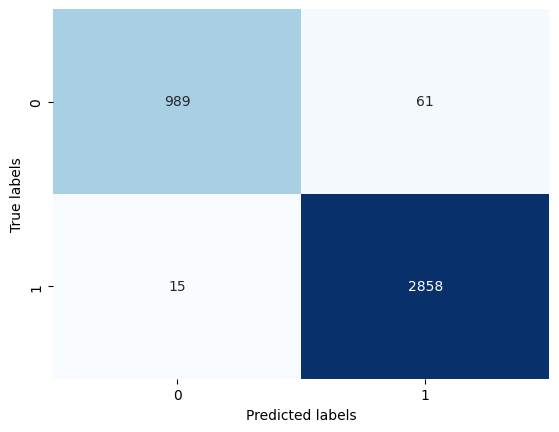

In [39]:
c_r(y_valid,y_pred)

**Accuracy with Real Test Dataset**

In [41]:
real_preds = neigh.predict(X_t)

In [42]:
real_preds

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [43]:
df_test['Name']

0                                    Skype-8.10.0.9.exe
1                                   vlc-3.0.2-win64.exe
2                                         stinger32.exe
3                                  SpotifyFullSetup.exe
4                                      uftp_english.exe
5     161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...
6     eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...
7                                     reverse_shell.exe
8     873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...
9                               ScratchInstaller1.4.exe
10    69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...
11    3334686141a400bb522824fa6f7faf30614372fe11837a...
12    3ec4cb928846f8298e5a13b3e96bfc2a709cb3b005a31e...
13    252f705dc15d7a305afd3e0619fa014c10b679248f71b7...
14                                         wordweb8.exe
15    c89f1e55b418a4447394994498971c6e6f3848bfe39ef9...
16                                   winrar-x64-550.exe
Name: Name, dtype: object

In [44]:
for x in df_test.iterrows():
    i,d=x
    print(f"{d['Name']}:{real_preds[i]}")

Skype-8.10.0.9.exe:0
vlc-3.0.2-win64.exe:0
stinger32.exe:1
SpotifyFullSetup.exe:0
uftp_english.exe:0
161a59f2525518f799c63f916c80fe85f50c5b09c74dc26ba90c27a87335a6ce:1
eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e5199ea7dbf605642eb3f0:0
reverse_shell.exe:0
873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d89de47118c79080104e:0
ScratchInstaller1.4.exe:0
69eb27dd3bbf5077dcd795872535b89af9a898254b90adaf5af1a4755bbd90da:0
3334686141a400bb522824fa6f7faf30614372fe11837aa397c51ffce81abe8f:1
3ec4cb928846f8298e5a13b3e96bfc2a709cb3b005a31ece81dc67af1e9b3e0a:1
252f705dc15d7a305afd3e0619fa014c10b679248f71b7ba38f02eed25bec5c6:1
wordweb8.exe:0
c89f1e55b418a4447394994498971c6e6f3848bfe39ef9ba6fb255791358b00c:0
winrar-x64-550.exe:0


# **Random Forest**

In [46]:
df_train = pd.read_csv('./dataset_malwares.csv')

In [47]:
dropped_df = df_train.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

<ipython-input-48-18f0afbd20aa>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-48-18f0afbd20aa>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please a

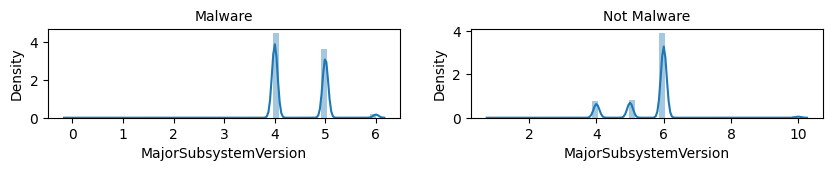

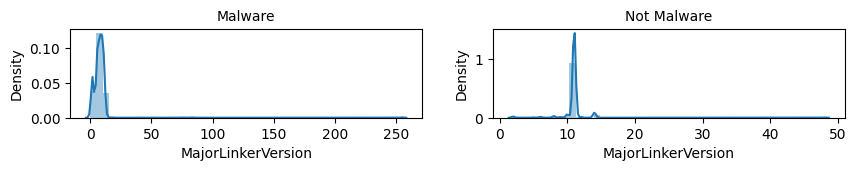

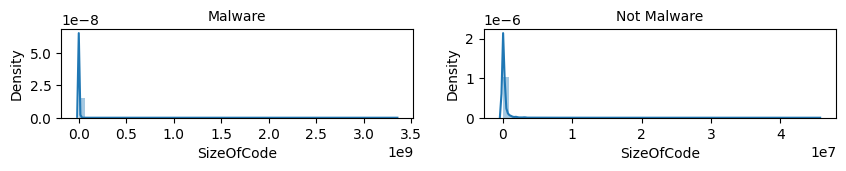

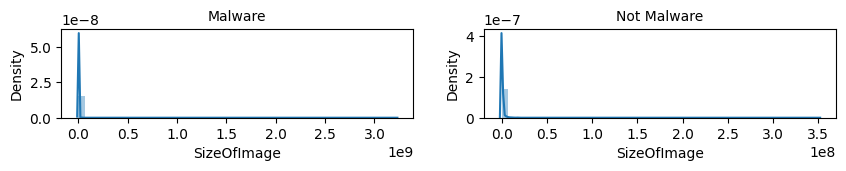

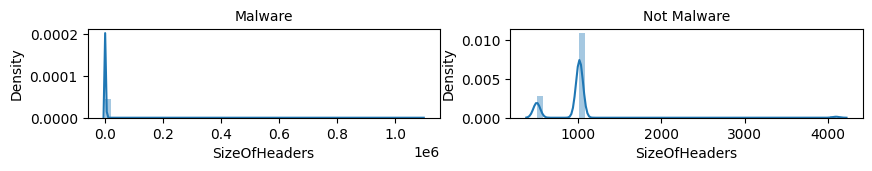

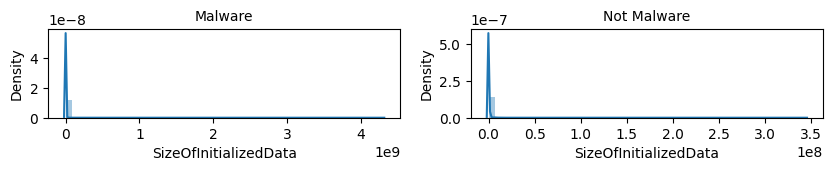

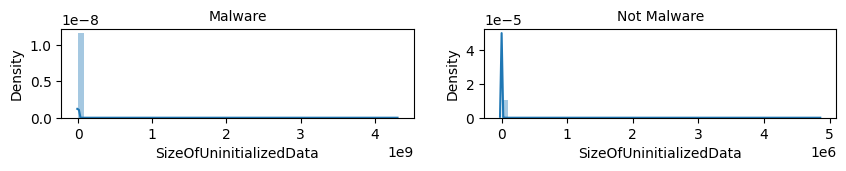

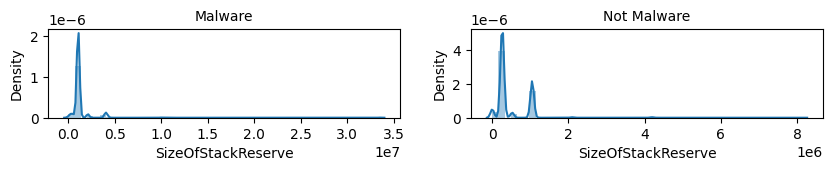

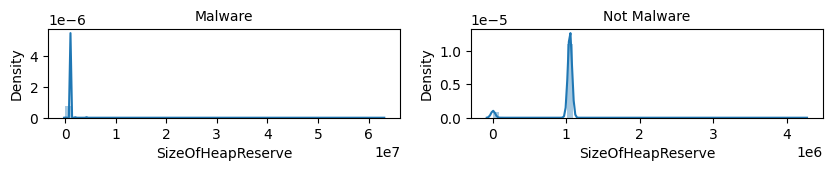

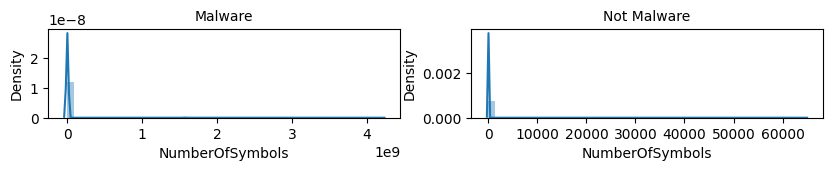

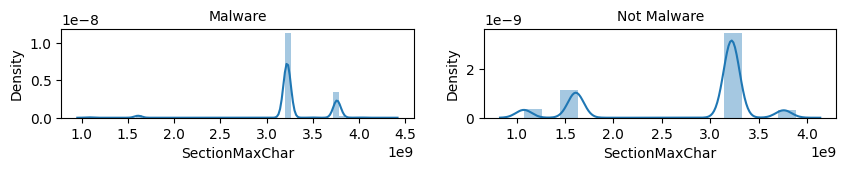

In [48]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData',
            'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 'NumberOfSymbols', 'SectionMaxChar']
i=1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(df_train[df_train['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(df_train[df_train['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2

In [49]:
X_train = dropped_df
y = df_train['Malware']

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
print("Number of used features:", X_train.shape[1])

Number of used features: 69


In [52]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(
    # Set the number of trees to 100
    n_estimators=100,
    # Set the random state to 0 to ensure reproducibility
    random_state=0,
    # Enable the out-of-bag (OOB) score
    oob_score = True,
    # Set the maximum depth of the trees to 16
    max_depth = 16)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [53]:
y_pred = clf.predict(X_valid)

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923



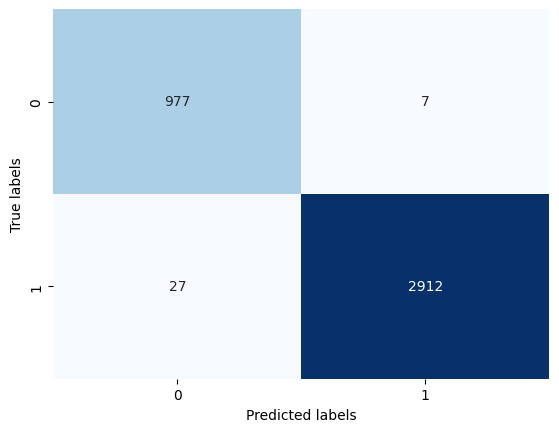

In [55]:
c_r(y_valid,y_pred)

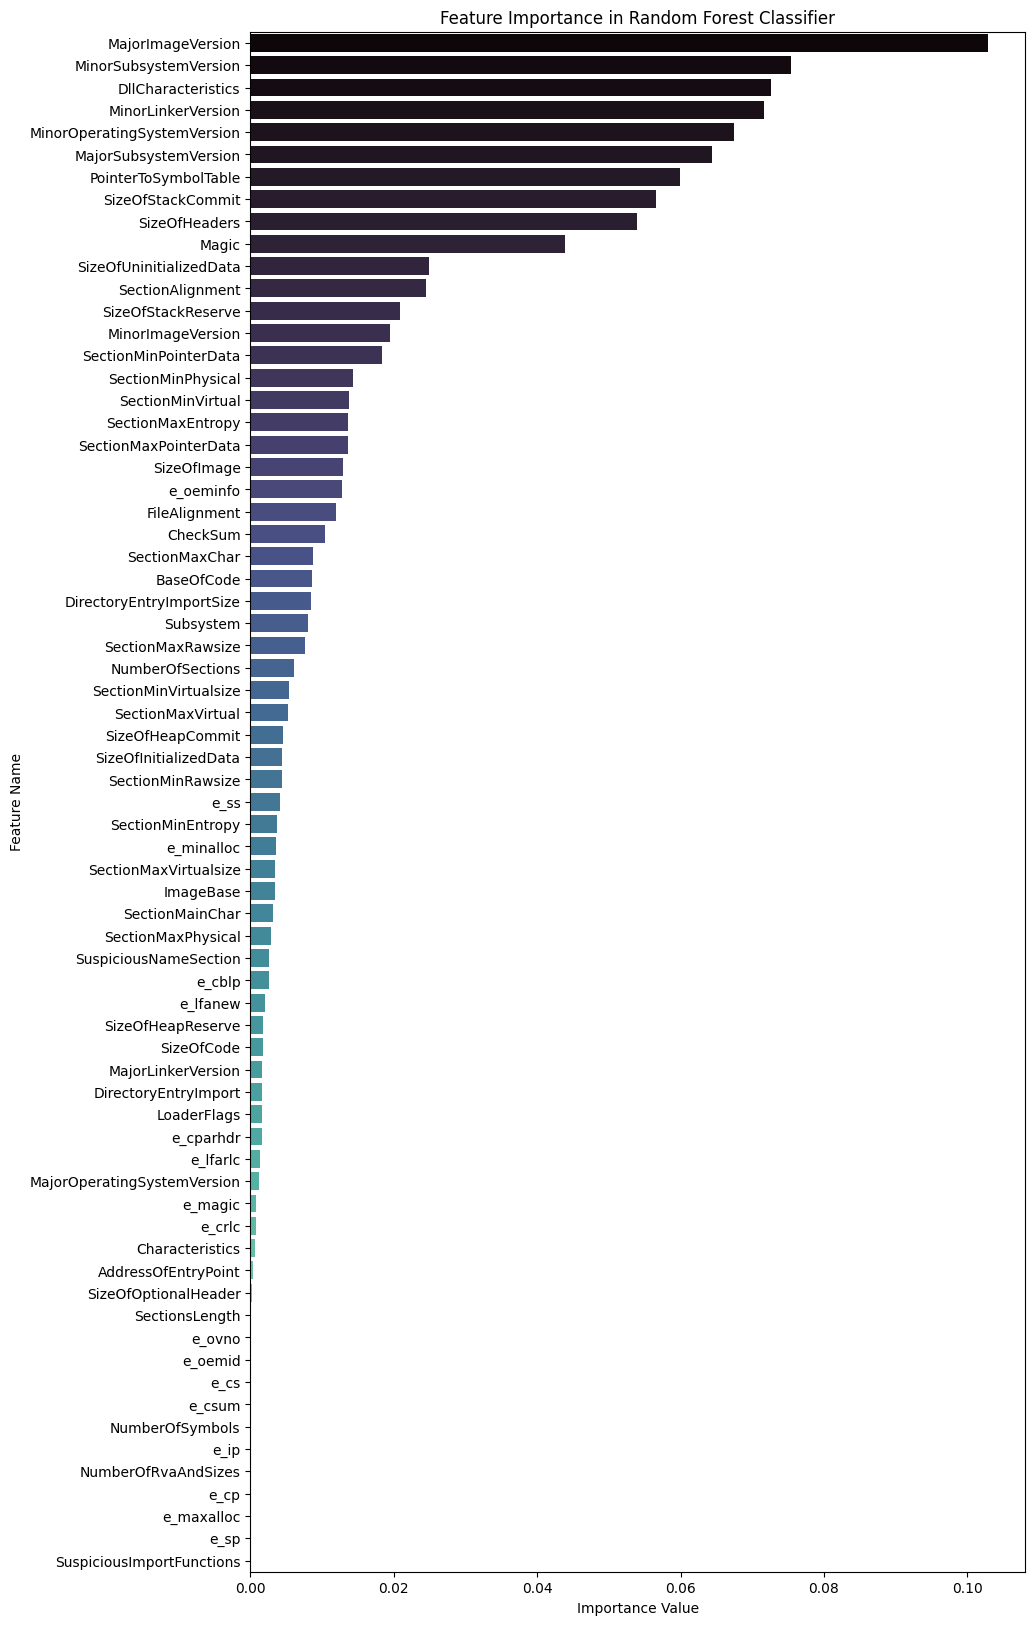

In [56]:
importance = clf.feature_importances_
importance_dict = dict(zip(dropped_df.columns.values, importance))
sorted_importance = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 20))
sns.barplot(x=list(sorted_importance.values()), y=list(sorted_importance.keys()), palette='mako')
plt.xlabel('Importance Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()